# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table', class_='table')

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [16]:
# Create an empty list
mars_data = []
row_heading = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Loop through the scraped data to create a list of rows
rows = table.find_all('tbody')

# Iterate through each row in the table body
for tbody in rows:
    # Find all the table rows in the tbody
    table_rows = tbody.find_all('tr')
    
    # Iterate through each row in the table body
    for row in table_rows:
        # Find all the table data cells in the row
        cells = row.find_all('td')
        
        # Extract the text from each cell and strip whitespace
        row_data = [cell.text.strip() for cell in cells]
        
        # Combine the heading and data into a dictionary for each row
        if row_data:  # Ensure there is data in the row
            mars_data.append(dict(zip(row_heading, row_data)))

mars_data

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [17]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=row_heading)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [18]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [20]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [21]:
# Change data types for data analysis
mars_df[['sol','ls','month']] = mars_df[['sol','ls','month']].astype('int32')
mars_df[['min_temp','pressure']] = mars_df[['min_temp','pressure']].astype('float64')
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [22]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
unique_month_count = mars_df['month'].nunique()

print(f'There are {unique_month_count} months on Mars.')

There are 12 months on Mars.


In [27]:
# 2. How many sols (Martian days) worth of data are there?
sols_of_data = mars_df['sol'].count()

print(f'There are {sols_of_data} sols (Martian days) worth of data in this table.')

There are 1867 sols (Martian days) worth of data in this table.


In [41]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Display the result
average_min_temp_by_month = pd.DataFrame(average_min_temp_by_month)

average_min_temp_by_month.columns = ['average_min_temp']
average_min_temp_by_month

,average_min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


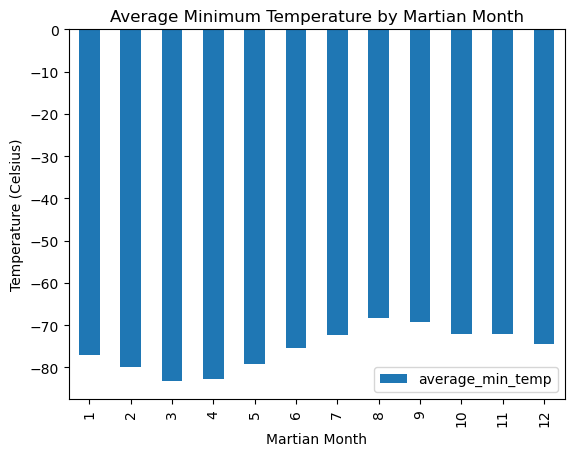

In [42]:
# Plot the average minimum temperature by month

average_min_temp_by_month.plot(kind='bar')
plt.xlabel('Martian Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Minimum Temperature by Martian Month')
plt.show()

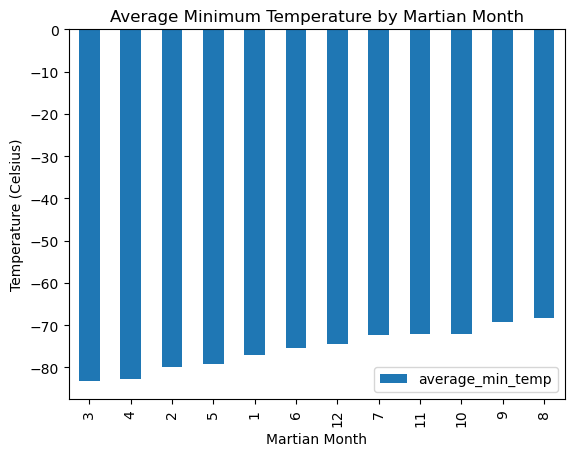

In [43]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

average_min_temp_by_month_sorted = average_min_temp_by_month.sort_values('average_min_temp')

average_min_temp_by_month_sorted.plot(kind='bar')
plt.xlabel('Martian Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Minimum Temperature by Martian Month')
plt.show()

In [44]:
# 4. What is the average pressure by month?
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Display the result
average_pressure_by_month = pd.DataFrame(average_pressure_by_month)

average_pressure_by_month.columns = ['average_pressure']
average_pressure_by_month

,average_pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


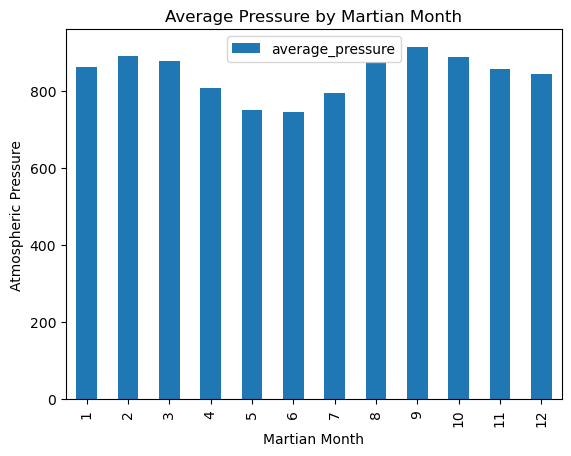

In [45]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar')
plt.xlabel('Martian Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Martian Month')
plt.show()

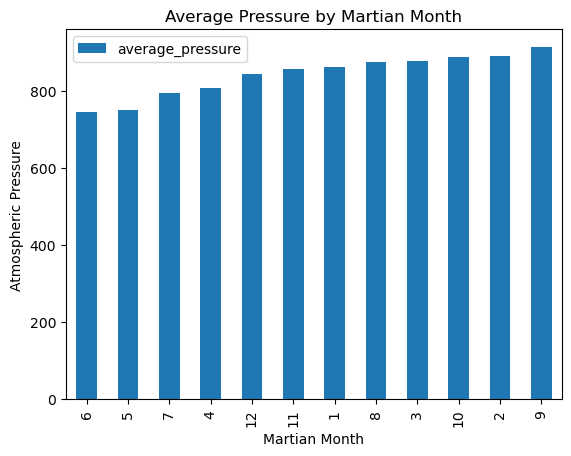

In [46]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
average_pressure_by_month_sorted = average_pressure_by_month.sort_values('average_pressure')

average_pressure_by_month_sorted.plot(kind='bar')
plt.xlabel('Martian Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Martian Month')
plt.show()

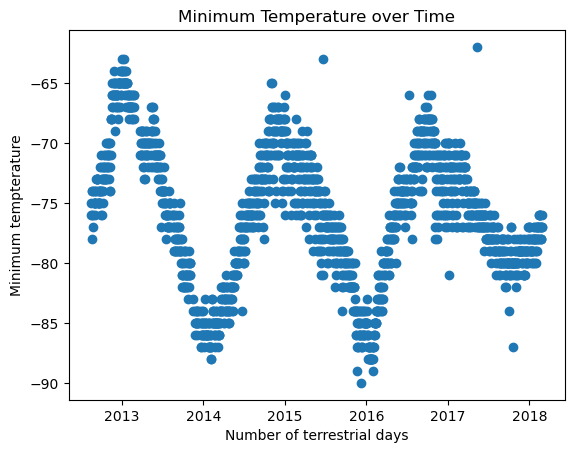

In [47]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


plt.scatter(mars_df['terrestrial_date'], mars_df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum tempterature')
plt.title('Minimum Temperature over Time')
plt.show()

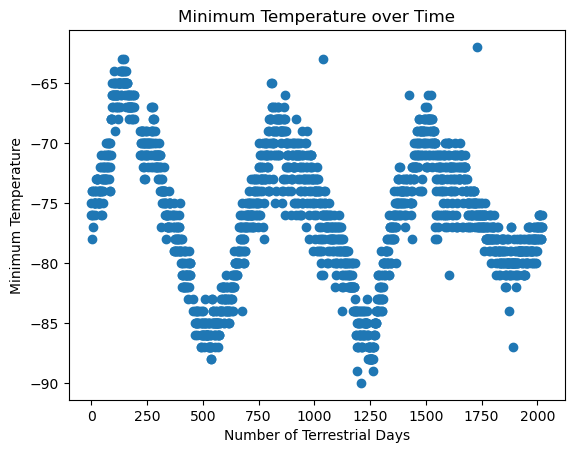

In [48]:
#This graph above shows the x-axis as years instead of days, below is a slight alteration to the code to convert the x-axis to days
mars_df['terrestrial_days'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days

# Now create the scatter plot using the new 'terrestrial_days' column
plt.scatter(mars_df['terrestrial_days'], mars_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.show()


#### Minimum Temperature

On average, the third month has the lowest temperature and the 8th month has the highest temperature.

#### Atmospheric Pressure

On average, the 6th month has the lowest atmospheric pressure and the 9th month has the highest atmospheric pressure.

#### Year Length

According to the graph, there are approximately 650 terrestrial days in a Martian year. This was approximated by observing the distance that it took for the minimum temperatures to complete a full circuit greatest minimum temperature to lowest minimum temperature and return to approximately the minimum temperature documented on day 0 of data collection. This cycle is represented approximately in the graph from day 0 to day 675 and day 676 to day 1350. Since data was collected over 1867 days, there was not enough days to observe a full third circuit/year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [49]:
# Write the data to a CSV
mars_df.to_csv("Resources/Mars_Data.csv", index = False)

#I didn't include the index, since csv/excel automatically counts rows anyway and the terestrial_date increments at the same rate as the index. If it's best practices to keep the index in, please let me know!

In [50]:
browser.quit()